In [1]:
# dont ask me, and I won't clean it..
import numpy as np
import glob
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import os
%tensorflow_version 1.x
from PIL import Image
from keras import layers
from keras.models import Model
from keras.models import load_model
from keras.utils.vis_utils import plot_model  #plotting the model structure
from keras import callbacks
from datetime import datetime
import os
import cv2
import string
import numpy as np


from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
import warnings
warnings.filterwarnings('ignore')
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint


from keras import layers        # functional 
from keras.models import Model
from keras.models import load_model
from keras import callbacks
import cv2
import string
import numpy as np
from datetime import datetime
from packaging import version
import tensorflow as tf
from tensorflow import keras

TensorFlow 1.x selected.


Using TensorFlow backend.


In [2]:
#! rm -rf railway_captcha3.tar.gz
! wget "https://ndownloader.figshare.com/files/22149861" -O samples.tar.gz


--2020-04-08 09:08:29--  https://ndownloader.figshare.com/files/22149861
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 34.242.31.21, 34.246.188.184, 34.246.143.19, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|34.242.31.21|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22149861/samples.tar.gz [following]
--2020-04-08 09:08:30--  https://s3-eu-west-1.amazonaws.com/pfigshare-u-files/22149861/samples.tar.gz
Resolving s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)... 52.218.100.203
Connecting to s3-eu-west-1.amazonaws.com (s3-eu-west-1.amazonaws.com)|52.218.100.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 390645514 (373M) [application/gzip]
Saving to: ‘samples.tar.gz’

samples.tar.gz      100%[===================>] 372.55M  81.9MB/s    in 4.5s    

2020-04-08 09:08:34 (83.0 MB/s) - ‘samples.tar.gz’ saved [390645514/3906455

In [3]:
! tar -xvf samples.tar.gz > /dev/null
! echo "Untaring... done..."

Untaring... done...


In [4]:
png_files = glob.glob('samples/*.png')
print("Total # of files => ",len(png_files))
png_files[0]

Total # of files =>  10000


'samples/2634.png'

In [5]:
symbols = '0123456789' # These are all symbols the captchas will have
num_symbols = len(symbols)
img = np.array(Image.open(png_files[0]))
shape_ = img.shape
print(shape_,"number of Symbols = ", num_symbols)

(100, 200, 3) number of Symbols =  10


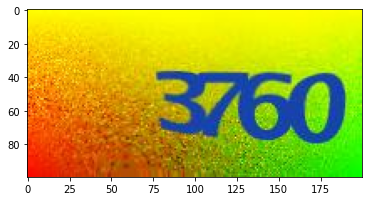

In [6]:
img_path = png_files[1]
img = cv2.imread(img_path,cv2.IMREAD_UNCHANGED)
plt.imshow(img[:,:,::-1])
plt.show()

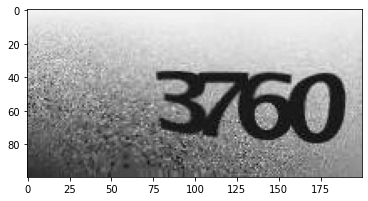

In [7]:
# thresholding binary inverse

img_path = png_files[1]
img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
#ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(img,cmap='gray')
plt.show()

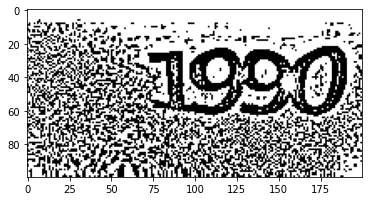

In [0]:
# adaptive thresholding
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
plt.imshow(th3,cmap='gray')
plt.show()

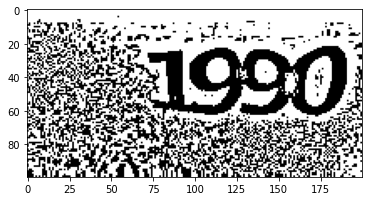

In [0]:
# mean adaptive thresholding
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
plt.imshow(th2,cmap='gray')
plt.show()

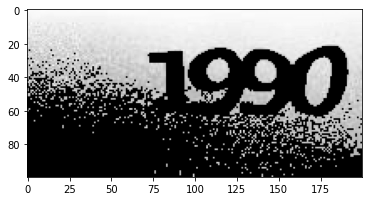

In [0]:
ret2,thres = cv2.threshold(img,0,255,cv2.THRESH_TOZERO+cv2.THRESH_OTSU)
plt.imshow(thres,cmap='gray')
plt.show()

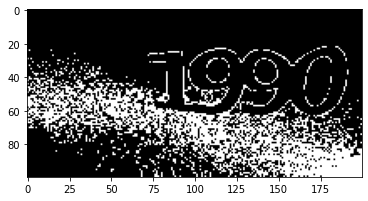

In [0]:
im_thres = thresh-(255-thres)
plt.imshow(im_thres,cmap='gray')
plt.show()

In [8]:
png_files[0]

'samples/2634.png'

In [12]:
from tqdm import tqdm
kernel = np.ones((2,2),np.uint8)

def preprocess_data():
  n_samples = len(os.listdir('samples/'))
  X = np.zeros((n_samples, 200, 100, 1)) #1070*50*200
  print(num_symbols,n_samples)
  y = np.zeros((4, n_samples, num_symbols)) #5*1070*36
  for i, pic in tqdm(enumerate(os.listdir('samples/'))):
    # Read image as grayscale
    img = cv2.imread(os.path.join('samples/', pic), cv2.IMREAD_GRAYSCALE)
    pic_target = pic.split('.')[0]
    # plt.imshow(img,cmap='gray')
    # plt.show()
    # break
    img = img / 255.0
    #plt.imshow(img,cmap='gray')
    img = np.reshape(img, (200, 100, 1))
    # Define targets and code them using OneHotEncoding
    targs = np.zeros((4, num_symbols))
    #print("num symbols = ",num_symbols)
    for j, l in enumerate(pic_target):
      ind = symbols.find(l)
      targs[j, ind] = 1
    X[i] = img
    y[:, i] = targs
    
  # Return final data
  return X, y

X, y = preprocess_data()

119it [00:00, 1182.96it/s]

10 10000


10000it [00:08, 1183.31it/s]


In [15]:
#print(X[0])
print(X.shape)
print(X[0].shape)
#print(y[0])
print(y.shape)
print(y[0].shape)

(10000, 200, 100, 1)
(200, 100, 1)
(4, 10000, 10)
(10000, 10)


In [0]:
X_train, y_train = X[:9000], y[:, :9000]
X_test, y_test = X[9000:], y[:, 9000:]

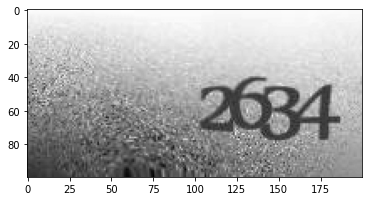

(200, 100, 1)


In [17]:
plt.imshow(X_train[0].reshape((100,200)),cmap='gray')
plt.show()
print(X_train[0].shape)

In [0]:
def create_model():
  in_ = Input(shape=img_shape)
  out = in_
  out = Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu')(out)
  out = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(out)
  out = BatchNormalization()(out)
  out = MaxPooling2D(pool_size=(2, 2))(out)
  out = Dropout(0.3)(out)
  out = Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu')(out)
  out = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(out)
  out = BatchNormalization()(out)
  out = MaxPooling2D(pool_size=(2, 2))(out)
  out = Dropout(0.3)(out)
  out = Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu')(out)
  out = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(out)
  out = BatchNormalization()(out)
  out = MaxPooling2D(pool_size=(2, 2))(out)
  out = Dropout(0.3)(out)
  out = Conv2D(filters=256, kernel_size=(3, 3), activation='relu')(out)
  out = BatchNormalization()(out)
  out = MaxPooling2D(pool_size=(2, 2))(out)
  out = Flatten()(out)
  out = Dropout(0.3)(out)
  out = [Dense(10, name='digit1', activation='softmax')(out),\
      Dense(10, name='digit2', activation='softmax')(out),\
      Dense(10, name='digit3', activation='softmax')(out),\
      Dense(10, name='digit4', activation='softmax')(out)]
      #Dense(36, name='digit5', activation='softmax')(out)]
  model = Model(inputs=in_, outputs=out)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [19]:
img_shape = (200, 100, 1)
model=create_model();
model.summary();













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200, 100, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 200, 100, 32) 320         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 198, 98, 32)  9248        conv2d_1[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 198, 98, 32)  128      

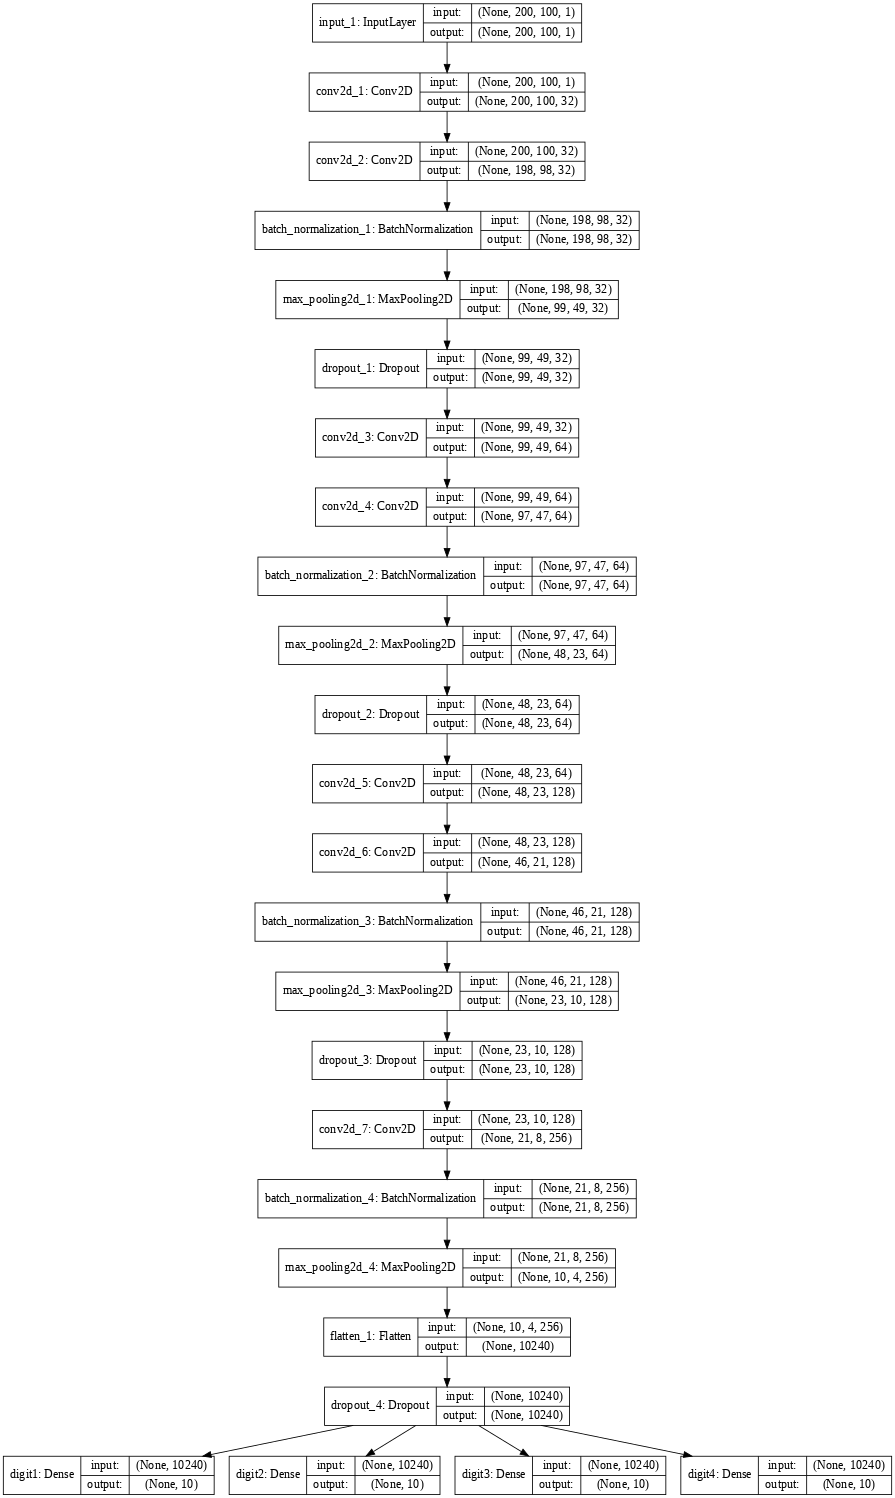

In [20]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True,dpi=60)

In [21]:
# for storing logs into tensorboard
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

hist = model.fit(X_train, [y_train[0], y_train[1], y_train[2],y_train[3]], batch_size=32, epochs=30,verbose=1, validation_split=0.2,callbacks=[tensorboard_callback])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 7200 samples, validate on 1800 samples
Epoch 1/30
7200/7200 [==============================] - 57s 8ms/step - loss: 12.4465 - digit1_loss: 3.1050 - digit2_loss: 3.1260 - digit3_loss: 3.2046 - digit4_loss: 3.0109 - digit1_acc: 0.1029 - digit2_acc: 0.1007 - digit3_acc: 0.1040 - digit4_acc: 0.1065 - val_loss: 18.4359 - val_digit1_loss: 3.9377 - val_digit2_loss: 4.0317 - val_digit3_loss: 5.4437 - val_digit4_loss: 5.0228 - val_digit1_acc: 0.1033 - val_digit2_acc: 0.1278 - val_digit3_acc: 0.1017 - val_digit4_acc: 0.1100
Epoch 2/30
7200/7200 [==============================] - 47s 7ms/step - loss: 9.9603 - digit1_loss: 2.4953 - digit2_loss: 2.4781 - digit3_loss: 2.5024 - digit4_loss: 2.4846 - digit1_acc: 0.1133 - digit2_acc: 0.1111 - digit3_acc: 0.1043 - digit4_acc: 0.1085 - val_loss: 9.4873 - val_digit1_loss: 2.4154 - val_digit2_loss: 2.3352 - val_digit3_loss: 2.3723 - val_digit4_loss: 2.3

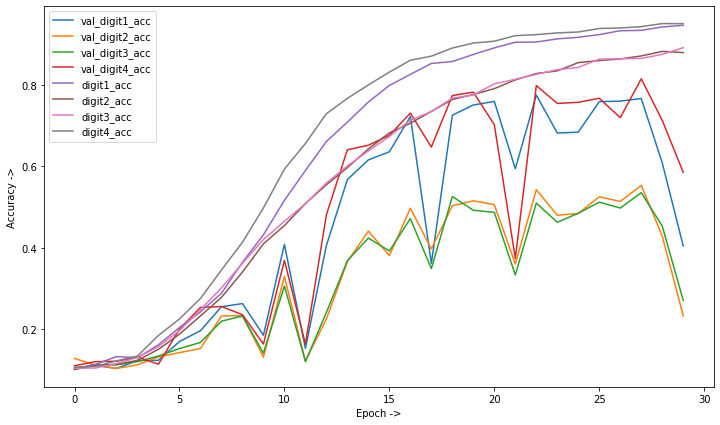

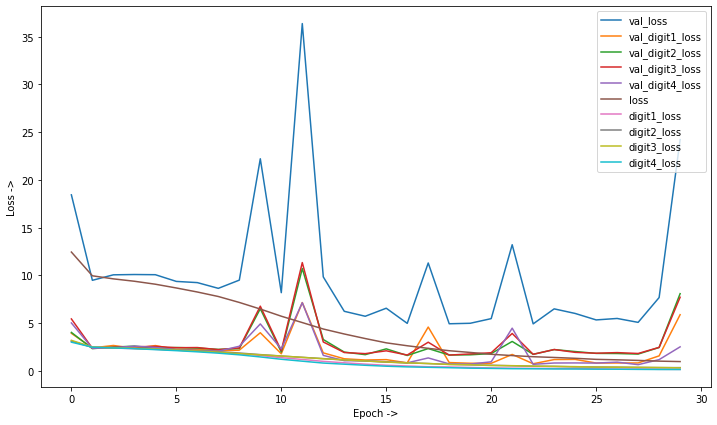

In [22]:
plt.figure(figsize=(12,7))
legend_acc = []
for item in hist.history.keys():
  if item.split('_')[-1:] == ['acc']:
    #print("Accuracy = ",item)
    legend_acc.append(item)
    plt.plot(hist.history[item])
plt.ylabel('Accuracy ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='lower left')
plt.show()

plt.figure(figsize=(12,7))
legend_acc = []
for item in hist.history.keys():
  if item.split('_')[-1:] == ['loss']:
    #print("Accuracy = ",item)
    legend_acc.append(item)
    plt.plot(hist.history[item])
plt.ylabel('Loss ->')
plt.xlabel('Epoch ->')
plt.legend(legend_acc, loc='upper right')
plt.show()

In [23]:
# download the model in computer for later use

model.save('samples_naive_grayscale.h5')
# download the model from colab
from google.colab import files
files.download('samples_naive.h5')

FileNotFoundError: ignored